<a href="https://colab.research.google.com/github/Baiqsafiravinili/Python/blob/main/Tugas_Presensi_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baiq Safira Vinili\
1101184007\
TT-42-G6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
f = Frekuensi (MHz)
Tipe_Area = Tipe Area (urban, suburban, open)
hT = Tinggi Pemancar (meter)
hR = Tinggi User (meter)
d = Jarak (meter)
'''
def cost(f,Tipe_Area,hT,hR,d):
    # Nilai Ca dan Cb untuk rentang frekuensi tertentu
    if f in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif f in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    # Nilai Cm untuk setiap Tipe Area
    if Tipe_Area == 'Urban' :
        Cm = 0
    elif Tipe_Area == 'Suburban' :
        Cm = -2*((np.log10((f/28)**2))-5.4)
    elif Tipe_Area == 'Open' :
        Cm = -4.78*(np.log10(f))+18.33*(np.log10(f))-40.94
    else :
        Cm = 'tipe salah'
    
    # Nilai variabel a dengan input Tinggi Penerima (hR) dan Frekuensi (f)
    a_hR = (1.1*np.log10(f)-0.7)*hR-(1.56*np.log10(f)-1.8)
    
    # Nilai Pathloss (dB)
    Lp = Ca+(Cb*np.log10(f))-(13.83*np.log(hT))-a_hR+((44.9-6.55*np.log10(hT))*np.log10(d))-Cm
    
    return Lp

In [ ]:
print("Masukan Parameter yang anda inginkan ! \n")

# Nilai Jarak Pemancar dan Penerima dengan 200 User diantara 200-700 m
d = np.random.randint(200,700,200)
d = d[np.argsort(d)]

# 3 Nilai Frekuensi untuk dibandingkan
f1 = 700
f2 = 900
f3 = 1800

# Tipe Area
Tipe_Area_1 = "Urban"
Tipe_Area_2 = "Suburban"
Tipe_Area_3 = "Open"

# Input Nilai Tinggi Pemancar
hT = float(input("Tinggi Pemancar (m) : "))

# Input Nilai Tinggi Penerima
hR = float(input("Tinggi Penerima (m) : "))

# Menghitung PathLoss (dB) dari 1800 MHz
PathLoss_Frek_1 = cost(f3,Tipe_Area_1,hT,hR,d)
PathLoss_Frek_1 = PathLoss_Frek_1[np.argsort(d)]

PathLoss_Frek_2 = cost(f3,Tipe_Area_2,hT,hR,d)
PathLoss_Frek_2 = PathLoss_Frek_2[np.argsort(d)]

PathLoss_Frek_3 = cost(f3,Tipe_Area_3,hT,hR,d)
PathLoss_Frek_3 = PathLoss_Frek_3[np.argsort(d)]

# Menghitung PathLoss (dB) dari Area Urban
PathLoss_Tipe_1 = cost(f1,Tipe_Area_1,hT,hR,d)
PathLoss_Tipe_1 = PathLoss_Tipe_1[np.argsort(d)]

PathLoss_Tipe_2 = cost(f2,Tipe_Area_1,hT,hR,d)
PathLoss_Tipe_2 = PathLoss_Tipe_2[np.argsort(d)]

PathLoss_Tipe_3 = cost(f3,Tipe_Area_1,hT,hR,d)
PathLoss_Tipe_3 = PathLoss_Tipe_3[np.argsort(d)]

Masukan Parameter yang anda inginkan ! 

Tinggi Pemancar (m) : 80
Tinggi Penerima (m) : 1.5


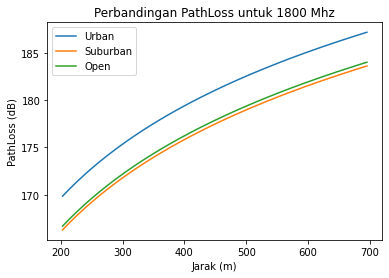

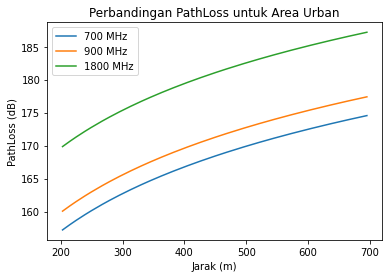

In [ ]:
# Grafik Perbandingan Pathloss dengan Frekuensi 1800 MHz
plt.figure()
plt.plot(d, PathLoss_Frek_1, label="Urban")
plt.plot(d, PathLoss_Frek_2, label="Suburban")
plt.plot(d, PathLoss_Frek_3, label="Open")
plt.legend()
plt.title("Perbandingan PathLoss untuk 1800 Mhz")
plt.xlabel("Jarak (m)")
plt.ylabel("PathLoss (dB)")
plt.show()

# Grafik Perbandingan Pathloss dengan Area Urban
plt.figure()
plt.plot(d, PathLoss_Tipe_1, label= "700 MHz")
plt.plot(d, PathLoss_Tipe_2, label= "900 MHz")
plt.plot(d, PathLoss_Tipe_3, label= "1800 MHz")
plt.legend()
plt.title("Perbandingan PathLoss untuk Area Urban")
plt.xlabel("Jarak (m)")
plt.ylabel("PathLoss (dB)")
plt.show()